## Classification

In [1]:
import numpy as np
import pandas as pd
import os
import theano
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import files

myfile = files.upload()
churn_data = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# some columns are totally unproductive so let's remove them
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [7]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# some columns have text data so let's one hot encode them
#  for more on one hot encoding click this link below
# https://www.kaggle.com/shrutimechlearn/types-of-regression-and-stats-in-depth
Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [9]:
Geography_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [10]:
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [11]:
Gender_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [12]:
churn_data_encoded = Gender_dummies

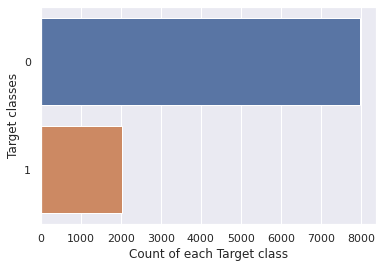

In [13]:
sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

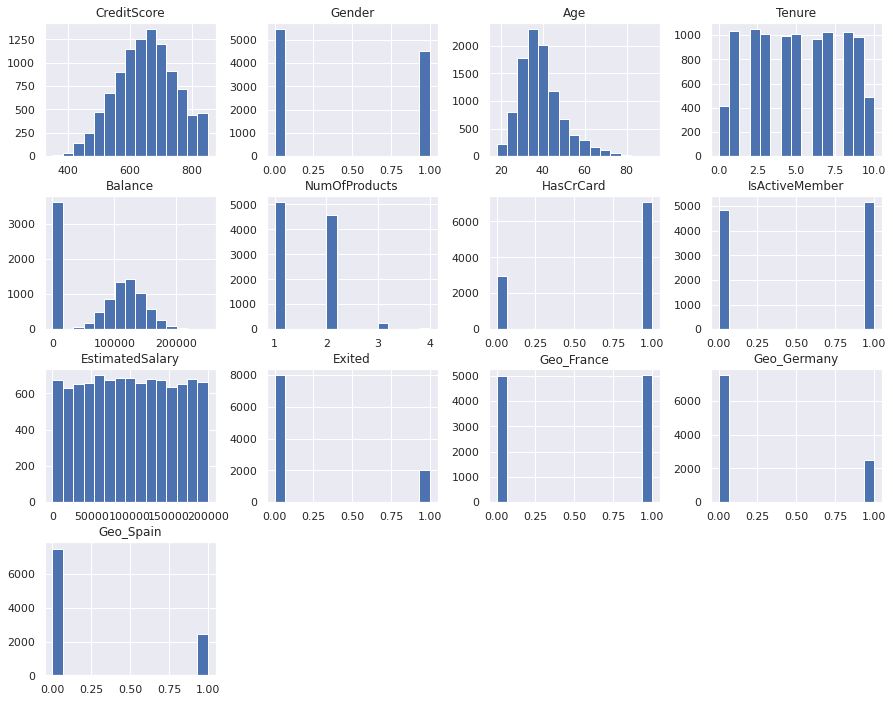

In [14]:
churn_data_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

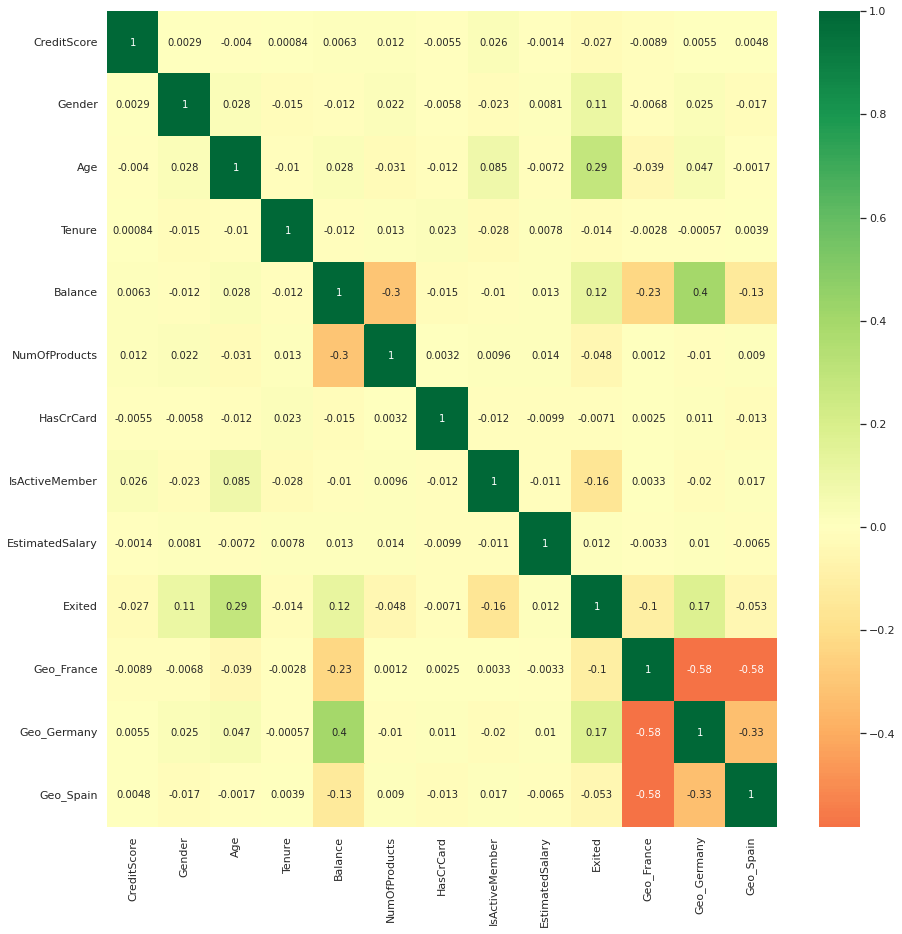

In [15]:
plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data_encoded.corr(), annot=True,cmap='RdYlGn',center=0) 

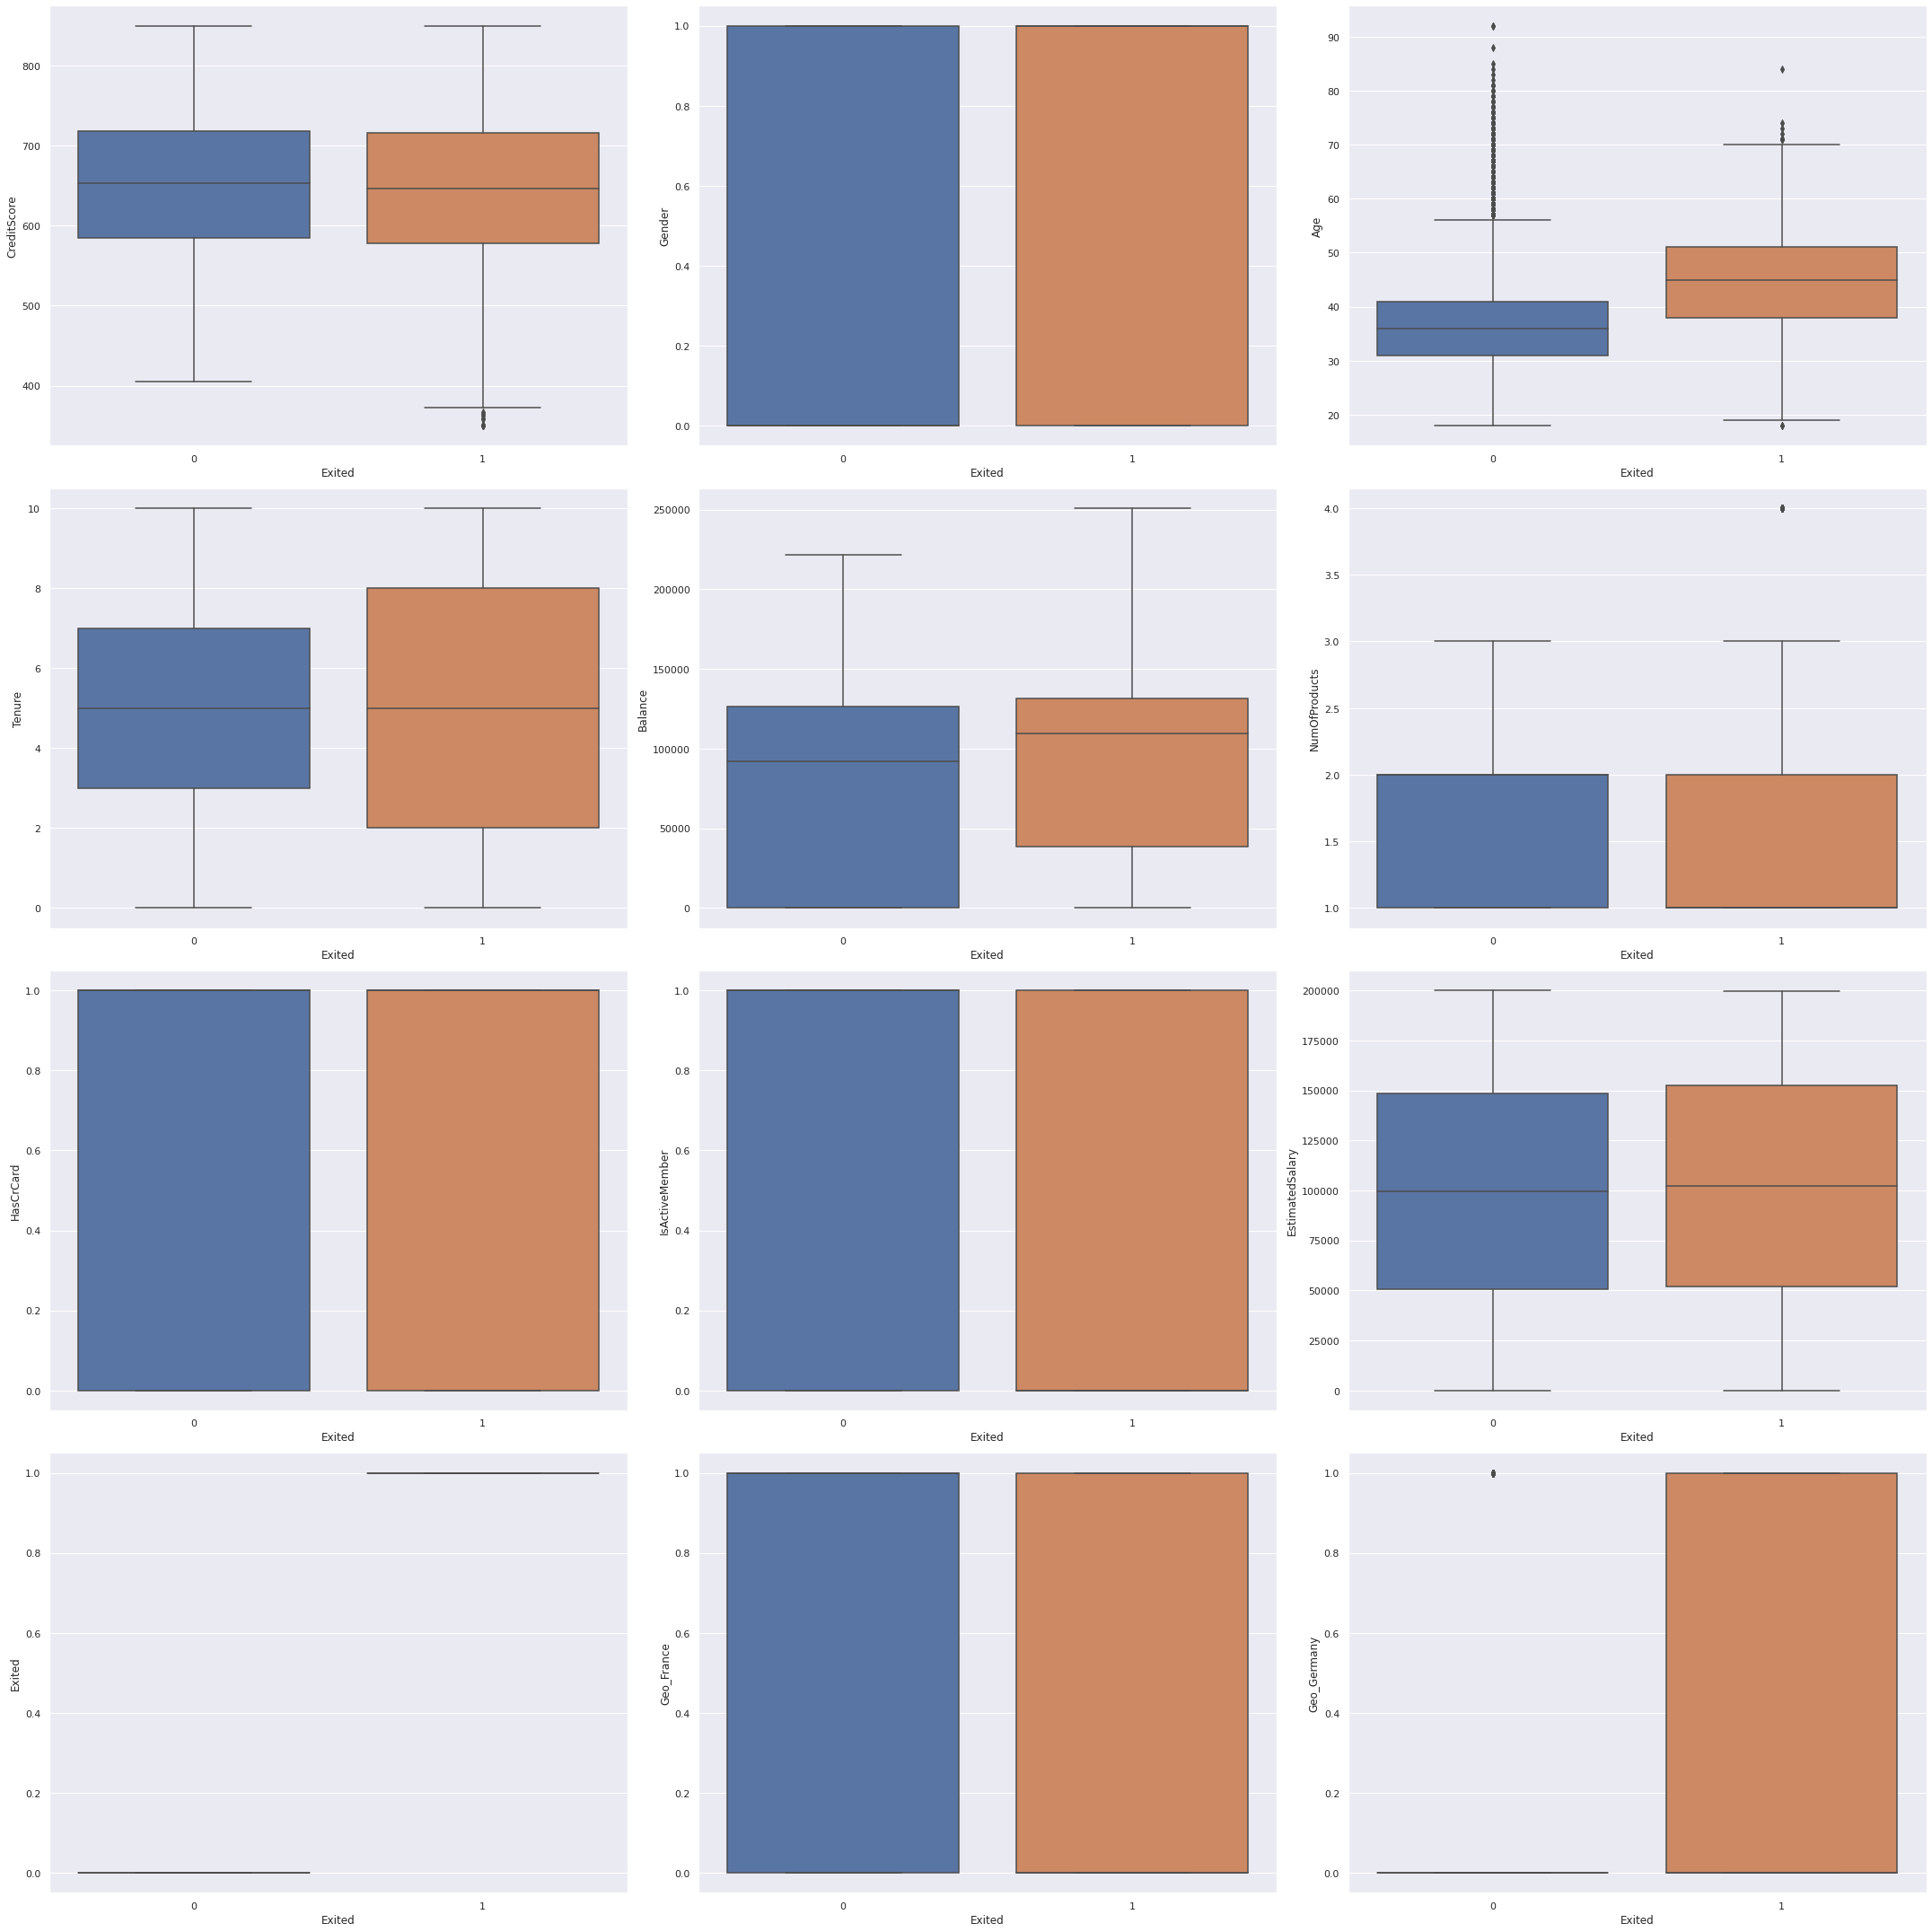

In [16]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

In [17]:
X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [18]:
X.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
6,645,0,44,8,113755.78,2,1,0,149756.71,0,0,1
7,822,0,50,7,0.00,2,1,1,10062.80,1,0,0
8,376,1,29,4,115046.74,4,1,0,119346.88,0,1,0
9,501,0,44,4,142051.07,2,0,1,74940.50,1,0,0


In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 12)
(8000,)
(2000, 12)
(2000,)


In [21]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



---



---



---



## 히든 레이어 3개



In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
#network.add(layers.Dense(256, activation = 'relu'))
#network.add(layers.Dense(128, activation = 'relu'))
#network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용


# Optimizer
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

network.compile(optimizer=adam,
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=70, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
92/92 [==============================] - 1s 4ms/step - loss: 0.4181 - accuracy: 0.8225 - val_loss: 0.3763 - val_accuracy: 0.8394 - lr: 0.0100
Epoch 2/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8506 - val_loss: 0.3660 - val_accuracy: 0.8562 - lr: 0.0100
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8542 - val_loss: 0.3585 - val_accuracy: 0.8575 - lr: 0.0100
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3439 - accuracy: 0.8606 - val_loss: 0.3651 - val_accuracy: 0.8475 - lr: 0.0100
Epoch 5/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8594 - val_loss: 0.3598 - val_accuracy: 0.8537 - lr: 0.0100
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3348 - accuracy: 0.8614 - val_loss: 0.3617 - val_accuracy: 0.8519 - lr: 0.0100
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3

In [23]:
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [25]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,185
Trainable params: 3,185
Non-trainable params: 0
_________________________________________________________________


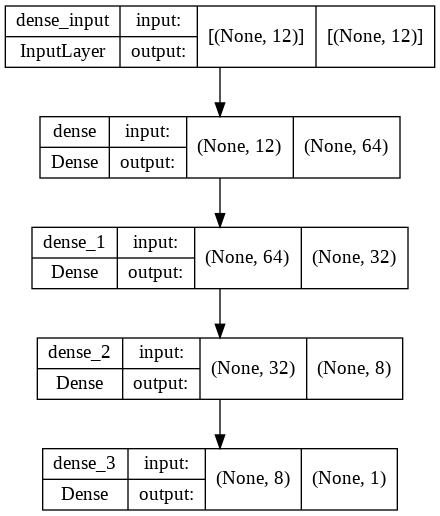

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

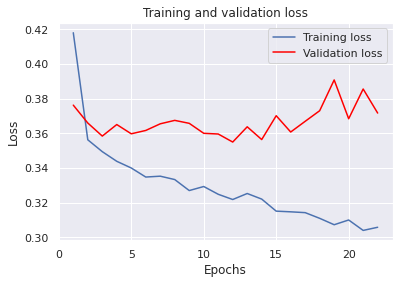

In [27]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

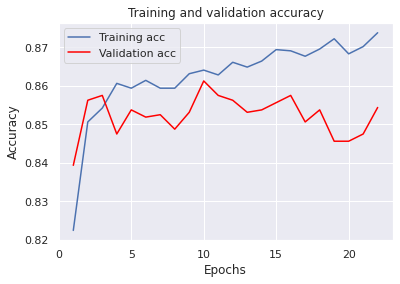

In [28]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [29]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8525
test loss: 0.34629517793655396
test_accuracy: 0.8525000214576721


Text(0.5, 12.5, 'Predicted label')

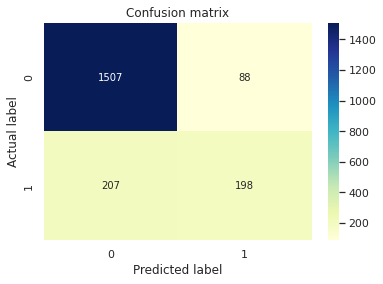

In [30]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.69      0.49      0.57       405

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



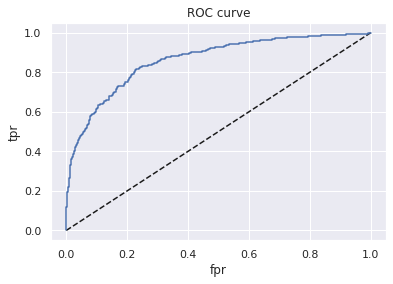

In [32]:
from sklearn.metrics import roc_curve
y_pred_proba = network.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [33]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8615209566933706



---



---



---



## 히든 레이어 4개

In [34]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
#network.add(layers.Dense(256, activation = 'relu'))
#network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용


# Optimizer
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

network.compile(optimizer=adam,
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=70, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
92/92 [==============================] - 1s 5ms/step - loss: 0.4165 - accuracy: 0.8164 - val_loss: 0.4032 - val_accuracy: 0.8238 - lr: 0.0100
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3723 - accuracy: 0.8445 - val_loss: 0.3822 - val_accuracy: 0.8519 - lr: 0.0100
Epoch 3/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8534 - val_loss: 0.3708 - val_accuracy: 0.8469 - lr: 0.0100
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8586 - val_loss: 0.3681 - val_accuracy: 0.8481 - lr: 0.0100
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8609 - val_loss: 0.3581 - val_accuracy: 0.8481 - lr: 0.0100
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3378 - accuracy: 0.8617 - val_loss: 0.3542 - val_accuracy: 0.8606 - lr: 0.0100
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3

In [35]:
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [37]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1664      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12,273
Trainable params: 12,273
Non-trainable params: 0
_________________________________________________________________


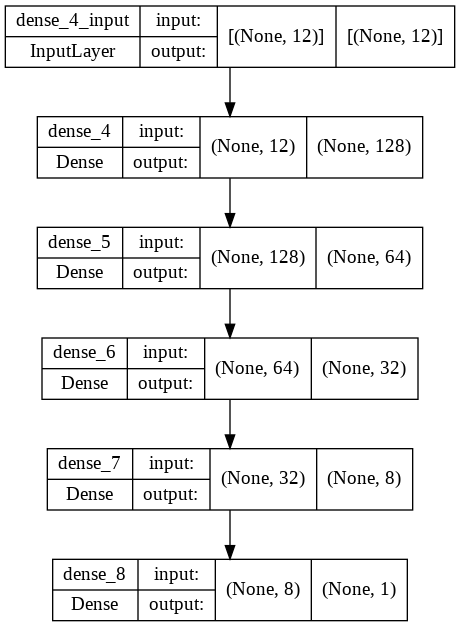

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

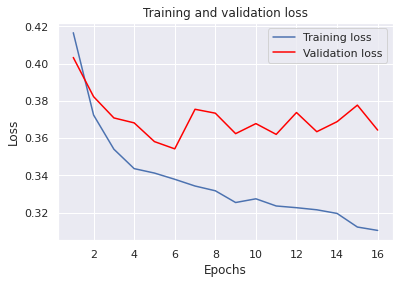

In [39]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

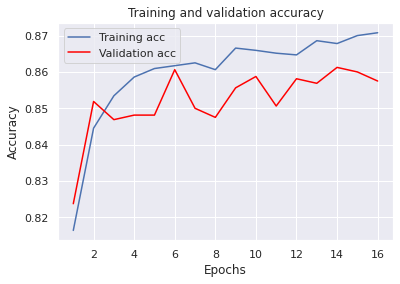

In [40]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [41]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8630
test loss: 0.3478328287601471
test_accuracy: 0.8629999756813049


Text(0.5, 12.5, 'Predicted label')

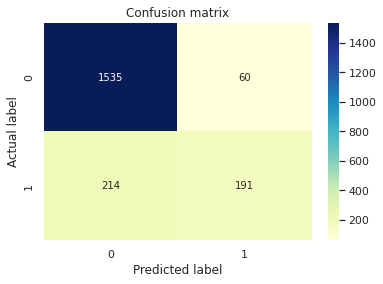

In [42]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.76      0.47      0.58       405

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



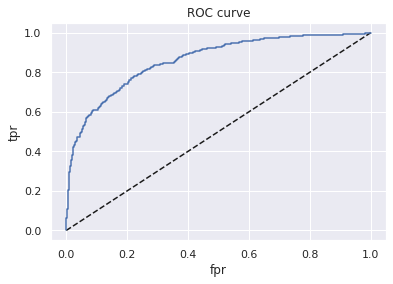

In [44]:
from sklearn.metrics import roc_curve
y_pred_proba = network.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [45]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8606865590773636



---



---



---



## 히든 레이어 6개

In [46]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(512, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
network.add(layers.Dense(256, activation = 'relu'))
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용


# Optimizer
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

network.compile(optimizer=adam,
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=70, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
92/92 [==============================] - 1s 8ms/step - loss: 0.4355 - accuracy: 0.7941 - val_loss: 0.4467 - val_accuracy: 0.7969 - lr: 0.0100
Epoch 2/100
92/92 [==============================] - 1s 6ms/step - loss: 0.3906 - accuracy: 0.8400 - val_loss: 0.3904 - val_accuracy: 0.8388 - lr: 0.0100
Epoch 3/100
92/92 [==============================] - 1s 6ms/step - loss: 0.3791 - accuracy: 0.8492 - val_loss: 0.3778 - val_accuracy: 0.8487 - lr: 0.0100
Epoch 4/100
92/92 [==============================] - 1s 7ms/step - loss: 0.3788 - accuracy: 0.8445 - val_loss: 0.3926 - val_accuracy: 0.8400 - lr: 0.0100
Epoch 5/100
92/92 [==============================] - 1s 6ms/step - loss: 0.3667 - accuracy: 0.8480 - val_loss: 0.3830 - val_accuracy: 0.8550 - lr: 0.0100
Epoch 6/100
92/92 [==============================] - 1s 6ms/step - loss: 0.3578 - accuracy: 0.8595 - val_loss: 0.3737 - val_accuracy: 0.8575 - lr: 0.0100
Epoch 7/100
92/92 [==============================] - 1s 6ms/step - loss: 0.3

In [47]:
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

In [48]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [49]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               6656      
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 8)                 264       
                                                                 
 dense_15 (Dense)            (None, 1)                

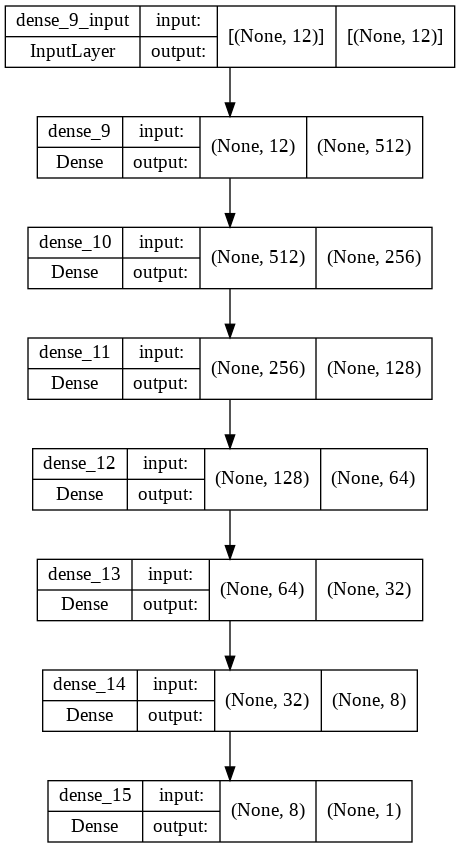

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)


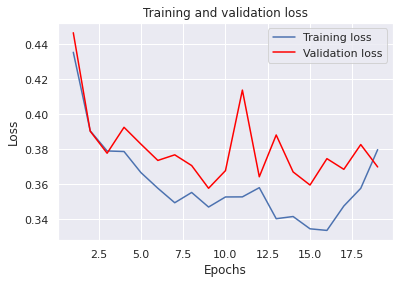

In [51]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


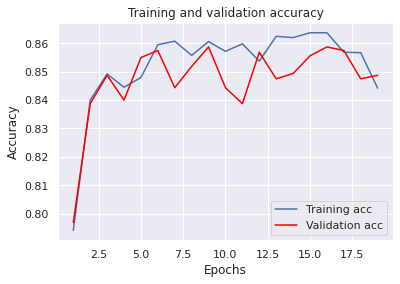

In [52]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [53]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8570
test loss: 0.3477851152420044
test_accuracy: 0.8569999933242798


Text(0.5, 12.5, 'Predicted label')

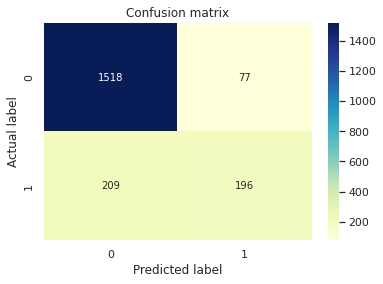

In [54]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [55]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.48      0.58       405

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



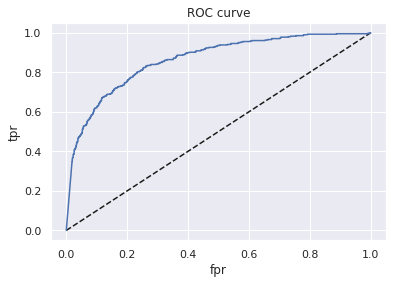

In [56]:
from sklearn.metrics import roc_curve
y_pred_proba = network.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()


In [57]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8625922055807114

## 히든 레이어 5개

In [58]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(256, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용

# Optimizer
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

network.compile(optimizer=adam,
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=70, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
92/92 [==============================] - 1s 5ms/step - loss: 0.4179 - accuracy: 0.8175 - val_loss: 0.3904 - val_accuracy: 0.8406 - lr: 0.0100
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3675 - accuracy: 0.8481 - val_loss: 0.3690 - val_accuracy: 0.8512 - lr: 0.0100
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.8548 - val_loss: 0.3660 - val_accuracy: 0.8525 - lr: 0.0100
Epoch 4/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3438 - accuracy: 0.8587 - val_loss: 0.3710 - val_accuracy: 0.8469 - lr: 0.0100
Epoch 5/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3475 - accuracy: 0.8570 - val_loss: 0.3625 - val_accuracy: 0.8525 - lr: 0.0100
Epoch 6/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3394 - accuracy: 0.8609 - val_loss: 0.3558 - val_accuracy: 0.8575 - lr: 0.0100
Epoch 7/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3

In [59]:
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [61]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               3328      
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 8)                 264       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 46,833
Trainable params: 46,833
Non-trai

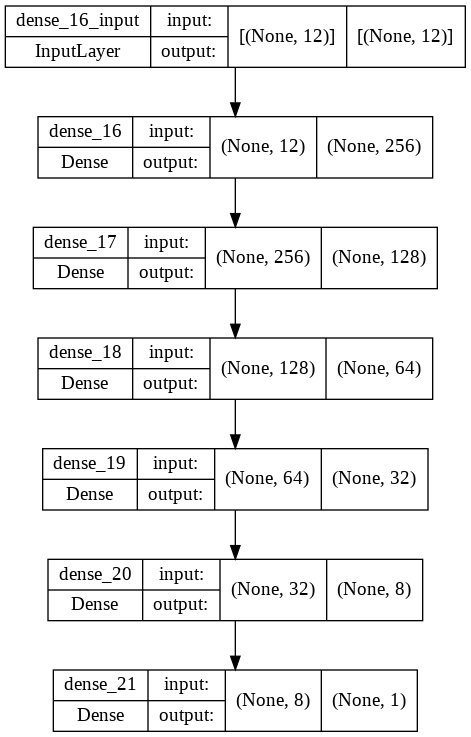

In [62]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)


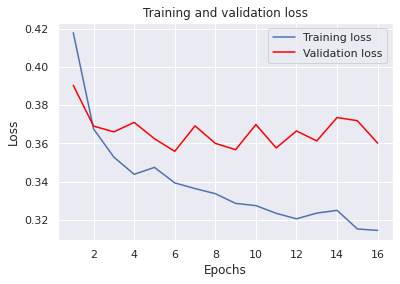

In [63]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

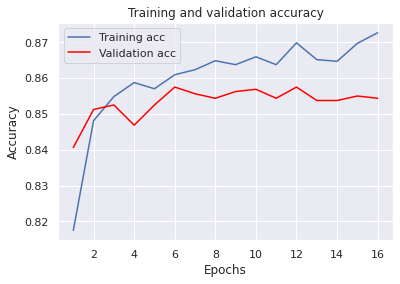

In [64]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [65]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8595
test loss: 0.3454020023345947
test_accuracy: 0.859499990940094


Text(0.5, 12.5, 'Predicted label')

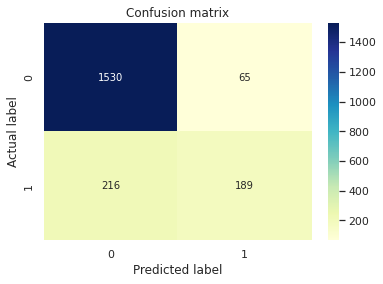

In [66]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [67]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.47      0.57       405

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



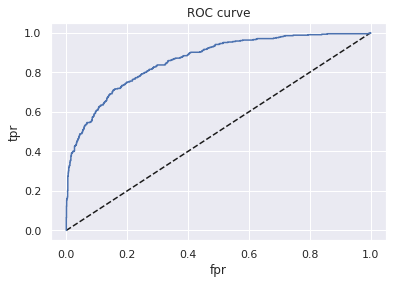

In [68]:
from sklearn.metrics import roc_curve
y_pred_proba = network.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [69]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8618615271488834

## 정해진 모델 batch size 최적화

In [84]:
list = [8, 16, 32, 64, 128, 256]
for i in list:
  # Modeling
  cls_history = network.fit(X_train, y_train, epochs=100, batch_size=i, validation_split=0.2,
                          callbacks=[es, lr])
  
  y_pred = network.predict(X_test)
  y_pred = (y_pred > 0.5)

  test_loss, test_acc = network.evaluate(X_test, y_test)
  print('test loss:', test_loss)
  print('test_accuracy:', test_acc)

  print(classification_report(y_test,y_pred))

  print(roc_auc_score(y_test,y_pred_proba))

Epoch 1/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3137 - accuracy: 0.8777 - val_loss: 0.3868 - val_accuracy: 0.8444 - lr: 0.0060
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3155 - accuracy: 0.8775 - val_loss: 0.3922 - val_accuracy: 0.8600 - lr: 0.0060
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3167 - accuracy: 0.8784 - val_loss: 0.3873 - val_accuracy: 0.8581 - lr: 0.0060
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3166 - accuracy: 0.8753 - val_loss: 0.3679 - val_accuracy: 0.8475 - lr: 0.0060
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3076 - accuracy: 0.8802 - val_loss: 0.4080 - val_accuracy: 0.8438 - lr: 0.0060
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3119 - accuracy: 0.8803 - val_loss: 0.3912 - val_accuracy: 0.8519 - lr: 0.0060
Epoch 7/100
800/800 [==============================] - 2s 2ms/st

ValueError: ignored

## RMSprop v/s Adam

## & 동시에 learning rate 찾기

In [85]:
list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006]
for i in list:
  
  network.compile(optimizer=optimizers.RMSprop(learning_rate=i),
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

  # Modeling
  cls_history = network.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2,
                          callbacks=[es, lr])
  
  y_pred = network.predict(X_test)
  y_pred = (y_pred > 0.5)
  cm = confusion_matrix(y_test, y_pred)

  test_loss, test_acc = network.evaluate(X_test, y_test)
  print('test loss:', test_loss)
  print('test_accuracy:', test_acc)

  print(classification_report(y_test,y_pred))

  print(roc_auc_score(y_test,y_pred_proba))

Epoch 1/100
800/800 [==============================] - 4s 3ms/step - loss: 0.2944 - accuracy: 0.8889 - val_loss: 0.3943 - val_accuracy: 0.8531 - lr: 0.0010
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.2915 - accuracy: 0.8895 - val_loss: 0.4262 - val_accuracy: 0.8587 - lr: 0.0010
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.2883 - accuracy: 0.8898 - val_loss: 0.4455 - val_accuracy: 0.8581 - lr: 0.0010
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.2879 - accuracy: 0.8920 - val_loss: 0.4437 - val_accuracy: 0.8525 - lr: 0.0010
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.2845 - accuracy: 0.8914 - val_loss: 0.4698 - val_accuracy: 0.8544 - lr: 0.0010
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.2844 - accuracy: 0.8922 - val_loss: 0.4647 - val_accuracy: 0.8544 - lr: 0.0010
Epoch 7/100
800/800 [==============================] - 2s 3ms/st

In [82]:
list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006]
for i in list:
  
  network.compile(optimizer=optimizers.Adam(learning_rate=i),
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

  # Modeling
  cls_history = network.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2,
                          callbacks=[es, lr])
  
  y_pred = network.predict(X_test)
  y_pred = (y_pred > 0.5)
  cm = confusion_matrix(y_test, y_pred)

  test_loss, test_acc = network.evaluate(X_test, y_test)
  print('test loss:', test_loss)
  print('test_accuracy:', test_acc)

  print(classification_report(y_test,y_pred))

  print(roc_auc_score(y_test,y_pred_proba))

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3516 - accuracy: 0.8739 - val_loss: 0.3861 - val_accuracy: 0.8481 - lr: 0.0010
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3441 - accuracy: 0.8736 - val_loss: 0.3765 - val_accuracy: 0.8562 - lr: 0.0010
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3362 - accuracy: 0.8723 - val_loss: 0.3758 - val_accuracy: 0.8562 - lr: 0.0010
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3323 - accuracy: 0.8737 - val_loss: 1.8708 - val_accuracy: 0.8469 - lr: 0.0010
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3320 - accuracy: 0.8758 - val_loss: 0.3735 - val_accuracy: 0.8612 - lr: 0.0010
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3279 - accuracy: 0.8748 - val_loss: 0.3748 - val_accuracy: 0.8506 - lr: 0.0010
Epoch 7/100
800/800 [==============================] - 2s 3ms/st



---



---



---



## 정해진 모델에 대한 구체적인 분석

In [86]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(256, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용

# Optimizer
from tensorflow.keras import optimizers

network.compile(optimizer=optimizers.Adam(learning_rate=0.005),
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4145 - accuracy: 0.8256 - val_loss: 0.3815 - val_accuracy: 0.8331 - lr: 0.0050
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3647 - accuracy: 0.8486 - val_loss: 0.3704 - val_accuracy: 0.8469 - lr: 0.0050
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3576 - accuracy: 0.8530 - val_loss: 0.3672 - val_accuracy: 0.8494 - lr: 0.0050
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3598 - accuracy: 0.8509 - val_loss: 0.3800 - val_accuracy: 0.8294 - lr: 0.0050
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3568 - accuracy: 0.8517 - val_loss: 0.3773 - val_accuracy: 0.8469 - lr: 0.0050
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3512 - accuracy: 0.8537 - val_loss: 0.3820 - val_accuracy: 0.8338 - lr: 0.0050
Epoch 7/100
800/800 [==============================] - 2s 3ms/st

In [87]:
network.get_weights()
#순서대로, (input layer -> hidden layer1 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-0.3409388 , -0.00151199, -0.2726288 , ..., -0.04085657,
         -0.09883217,  0.18698463],
        [-0.09857138, -0.03537122, -0.05730704, ..., -0.2900048 ,
         -0.06657501, -0.6878418 ],
        [-0.89836663, -0.09254668, -0.40234926, ..., -0.297796  ,
         -0.08484923, -0.7239434 ],
        ...,
        [ 0.00615224,  0.00590123,  0.00941529, ..., -0.05796899,
          0.0651092 ,  0.19285025],
        [-0.10343814, -0.09678006, -0.2933502 , ...,  0.00302606,
          0.07208317, -0.21629325],
        [ 0.10087441, -0.00468496,  0.3416145 , ...,  0.2482258 ,
          0.04046275,  0.09523776]], dtype=float32),
 array([-0.72117835, -0.4650874 , -0.921012  , -0.41654637, -0.80198663,
        -0.99974895, -0.71151376, -0.57410157, -0.8225486 , -0.72685164,
        -0.2141094 ,  0.32155696, -0.909841  , -0.8550707 , -1.0662309 ,
        -0.9840996 , -0.08625818, -1.2809237 , -1.0285765 , -1.264025  ,
        -1.3242697 , -0.59969735, -0.4451231 , -0.7890591 , -0.407

In [88]:
pd.DataFrame(network.get_weights()[0]) # input -> hidden의 weights

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.340939,-0.001512,-0.272629,0.295250,-0.370086,0.114288,-0.021847,0.188361,-0.228481,-0.824377,...,0.637655,-0.265466,-0.096739,0.243195,-0.558190,0.317568,-0.063353,-0.040857,-0.098832,0.186985
1,-0.098571,-0.035371,-0.057307,-0.063582,-0.141118,-0.880161,-0.120632,-0.080169,-0.133482,-0.301144,...,-0.380180,-0.194756,0.005544,0.022989,-0.580920,0.160844,-0.129321,-0.290005,-0.066575,-0.687842
2,-0.898367,-0.092547,-0.402349,-0.691391,-0.440769,-0.561792,-0.903180,-0.327457,0.382400,0.381891,...,-0.593981,-1.496592,0.975068,-0.709443,-1.324146,0.189684,-1.607634,-0.297796,-0.084849,-0.723943
3,0.135476,-0.044079,0.265501,0.164125,0.038570,0.413865,-0.387678,0.504077,0.407649,0.030269,...,0.352774,-0.120601,0.017536,-0.113978,0.085247,-0.841173,-0.266912,0.413038,0.040374,-0.339461
4,0.510121,-0.028875,-0.246846,-0.452893,0.250380,-0.286202,-0.243425,-0.464026,-0.166842,-0.173079,...,-0.109164,-0.138136,-0.061825,-0.813641,0.503640,0.459265,-0.281763,-0.396903,-0.033217,-0.393345
5,0.151038,-0.031647,0.119172,-0.176606,-0.553541,0.327788,-0.279425,-0.112333,-0.259633,0.170671,...,-0.074684,0.160136,-0.282735,0.294827,-0.049106,0.097991,0.135366,0.097489,-0.014383,-0.200798
6,0.253959,0.053513,0.211527,0.024255,0.198894,0.211595,0.003569,0.009827,-0.031640,-0.403235,...,0.320150,0.336482,0.013603,0.647427,-0.128190,0.022698,0.135998,-0.217589,-0.080730,-0.722228
7,-0.013343,-0.009231,-0.198994,0.083606,-0.315399,0.737659,-0.135471,0.401548,1.065758,-0.719996,...,-0.168106,0.010193,0.631281,0.511373,0.227611,-0.233528,-0.487517,0.259203,0.061088,0.197059
8,0.577457,-0.024960,0.312923,0.098456,0.818528,0.436688,0.432069,-0.091623,-0.079941,-1.154921,...,0.103209,0.311676,-0.176607,0.850700,0.229108,-0.713185,0.302204,0.482099,-0.015846,-0.569430
9,0.006152,0.005901,0.009415,-0.083853,0.236252,-0.244529,0.498136,0.082136,0.142370,0.087157,...,0.208265,0.019422,0.144466,0.086860,-0.637532,0.296298,-0.368574,-0.057969,0.065109,0.192850


In [89]:
pd.DataFrame(network.get_weights()[1]) # input -> hidden의 bias

,0
0,-0.721178
1,-0.465087
2,-0.921012
3,-0.416546
4,-0.801987
...,...
251,-1.015298
252,0.614668
253,-1.135564
254,-0.610339


In [90]:
pd.DataFrame(network.get_weights()[2]) # hidden -> hidden의 weights

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.120468,-0.180018,-0.714665,-0.142969,-0.093661,-0.812933,-1.212507,-0.578189,-0.118134,0.029308,...,-0.122942,-0.142590,-0.017404,0.352695,-0.511630,0.057176,0.026052,-0.144476,-0.013375,-0.234409
1,-0.108830,-0.010891,-0.086164,0.023229,-0.001502,-0.027819,-0.214288,0.055031,-0.093642,-0.141666,...,0.015966,-0.099411,0.017076,-0.161156,-0.000829,-0.104080,-0.087128,0.101769,0.058390,-0.004043
2,-0.057728,-0.611833,-0.709098,-0.043740,-0.250064,-0.205948,-0.208806,-0.638430,0.053201,-0.036886,...,-0.062593,-0.048642,-0.098637,-0.166028,0.054240,0.055385,-0.132146,0.359915,-0.180401,-0.262603
3,0.043442,-0.187760,-0.053095,-0.047046,0.079241,-0.266513,-0.368538,-0.201370,-0.135013,-0.052219,...,-0.106328,-0.028393,0.095159,0.460507,-0.240927,-0.078027,-0.037463,0.218083,-0.114289,-0.392936
4,0.050774,0.422142,0.332408,-0.084915,-0.078701,-0.369093,0.211100,-0.156221,0.074866,-0.174765,...,-0.125004,-0.162802,-0.114662,0.160965,-0.292094,0.036677,-0.103107,0.150846,0.006615,0.080741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-0.139779,0.448168,0.485844,0.071028,0.204682,-0.409279,0.744947,-0.024160,-0.155090,-0.168183,...,-0.193293,-0.096862,0.013038,-0.265242,-0.291432,-0.030104,-0.095556,0.000841,0.066490,-0.896673
252,0.097745,-0.592130,-0.481692,0.100805,0.143798,-0.146483,-0.709990,-1.167970,-0.240033,-0.117255,...,-0.129912,-0.166064,-0.021926,-0.107238,0.047393,-0.101707,-0.153544,-0.374881,-0.047224,-0.682888
253,-0.053300,-0.331056,-0.011602,-0.122873,-0.149066,-0.369427,0.465126,0.068042,0.001532,0.098595,...,-0.050561,0.055715,0.116242,0.118933,-0.226950,-0.025038,-0.016196,0.976707,-0.049294,-0.463426
254,0.023468,-0.121063,0.103916,0.015950,0.000664,-0.105791,-0.068690,-0.137370,-0.144792,0.122237,...,0.011202,0.072819,-0.124536,0.014192,-0.177650,0.071298,-0.105731,0.106727,0.054165,-0.028202


In [91]:
pd.DataFrame(network.get_weights()[3]) # hidden -> hidden의 bias

,0
0,-0.070243
1,0.392561
2,0.281743
3,-0.087007
4,0.089010
...,...
123,-0.050135
124,-0.119780
125,-0.617871
126,-0.080374


In [92]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [93]:
cls_history.history

{'accuracy': [0.8256250023841858,
  0.8485937714576721,
  0.8529687523841858,
  0.8509374856948853,
  0.8517187237739563,
  0.8537499904632568,
  0.8559374809265137,
  0.8567187786102295,
  0.8557812571525574,
  0.8617187738418579,
  0.8631250262260437,
  0.8637499809265137,
  0.8670312762260437,
  0.8637499809265137,
  0.8659374713897705,
  0.8684375286102295,
  0.8676562309265137,
  0.8692187666893005,
  0.8743749856948853,
  0.8737499713897705,
  0.8737499713897705,
  0.8778125047683716,
  0.8762500286102295,
  0.8817187547683716],
 'loss': [0.41453447937965393,
  0.36474427580833435,
  0.3576063811779022,
  0.359822541475296,
  0.3567802906036377,
  0.35119545459747314,
  0.3473682403564453,
  0.34346431493759155,
  0.34815311431884766,
  0.33651021122932434,
  0.3346050977706909,
  0.3301578164100647,
  0.3269039988517761,
  0.33131611347198486,
  0.3243389427661896,
  0.3244304358959198,
  0.3209960460662842,
  0.31545165181159973,
  0.3147416412830353,
  0.3104313910007477,
  0.

참고 (ANN):

https://onesixx.com/optimizer-loss-metrics/

https://keras.io/ko/metrics/

https://talkingaboutme.tistory.com/entry/DL-%ED%95%B4%EB%B3%B4%EB%A9%B4%EC%84%9C-%EB%B0%B0%EC%9A%B0%EB%8A%94-%EB%94%A5%EB%9F%AC%EB%8B%9D-ANN-%EA%B5%AC%ED%98%84-3

https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/

https://han-py.tistory.com/207

https://jackyoon5737.tistory.com/32

https://gomguard.tistory.com/187

https://blog.naver.com/qbxlvnf11/221449297033

https://wikidocs.net/32105

http://blog.naver.com/shwotjd14/221458224334

https://bioinformaticsandme.tistory.com/241

https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-4-%EC%98%81%ED%99%94-%EB%A6%AC%EB%B7%B0-%EB%B6%84%EB%A5%98-%EC%9D%B4%EC%A7%84-%EB%B6%84%EB%A5%98-%EC%98%88%EC%A0%9C/

https://codetorial.net/tensorflow/get_output_of_neuron_layers.html

https://codetorial.net/tensorflow/visualize_model.html

https://codetorial.net/tensorflow/visualize_training_history.html




https://wikidocs.net/44766

https://gooopy.tistory.com/80

https://codetorial.net/tensorflow/classifying_the_cats_and_dogs.html

https://ssongnote.tistory.com/10

- RBF
https://www.python2.net/questions-379561.htm